In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os

os.getcwd()


'/home/cuongvosgh/SLM'

In [2]:
data_ipa = pd.read_csv("./SLM_S2024/Competition/IPA.csv")

In [3]:
display(data_ipa)

,IsIPA,OG,FG,ABV,IBU,Color,BoilTime,BoilGravity,PitchRate,Efficiency,UserId
0,False,1.069,1.007,8.12,0.00,30.48,60,NaN,NaN,75.0,NaN
1,False,1.064,1.012,6.80,9.36,9.85,60,1.132,0.50,35.0,NaN
2,False,1.061,1.015,6.08,28.31,35.83,60,1.044,0.35,83.0,42087.0
3,False,1.053,1.012,5.44,46.48,5.77,60,1.033,NaN,70.0,NaN
4,False,1.053,1.017,4.64,42.29,4.22,90,1.039,0.50,77.0,14729.0
...,...,...,...,...,...,...,...,...,...,...,...
36995,False,1.069,1.012,7.39,71.03,3.95,75,1.051,NaN,70.0,NaN
36996,False,1.063,1.016,6.22,0.00,7.41,60,1.058,NaN,70.0,NaN
36997,True,1.056,1.015,5.50,38.05,20.59,60,1.089,0.75,70.0,NaN
36998,True,1.068,1.019,6.40,65.08,9.90,60,1.050,NaN,70.0,65316.0


In [5]:
data_ipa.isna().sum()

IsIPA              0
OG                 0
FG                 0
ABV                0
IBU                0
Color              0
BoilTime           0
BoilGravity     1328
PitchRate      19645
Efficiency         0
UserId         25448
dtype: int64

In [6]:
data_ipa.describe()

,OG,FG,ABV,IBU,Color,BoilTime,BoilGravity,PitchRate,Efficiency,UserId
count,37000.000000,37000.000000,37000.000000,37000.000000,37000.000000,37000.000000,35672.000000,17355.000000,37000.000000,11552.000000
mean,1.061632,1.014127,6.199508,49.942323,14.109863,64.953649,1.053834,0.734780,66.336975,43711.867036
std,0.079010,0.016245,1.760933,46.066534,12.812433,13.428294,0.026234,0.374779,13.901772,27799.337109
min,1.000000,0.999000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,49.000000
25%,1.051000,1.011000,5.180000,27.440000,5.410000,60.000000,1.041000,0.350000,65.000000,21446.250000
50%,1.059000,1.013000,5.910000,40.640000,8.310000,60.000000,1.048000,0.750000,70.000000,43653.000000
75%,1.068000,1.016000,6.880000,63.240000,17.650000,60.000000,1.058000,1.000000,75.000000,58820.000000
max,15.897000,3.974000,54.720000,3409.300000,186.000000,240.000000,1.500000,2.000000,100.000000,133746.000000


In [7]:
data_ipa["IsIPA"] = np.where(data_ipa["IsIPA"] == True, 1, 0)

In [8]:
data_ipa = data_ipa.drop(columns='UserId')
display(data_ipa)

,IsIPA,OG,FG,ABV,IBU,Color,BoilTime,BoilGravity,PitchRate,Efficiency
0,0,1.069,1.007,8.12,0.00,30.48,60,NaN,NaN,75.0
1,0,1.064,1.012,6.80,9.36,9.85,60,1.132,0.50,35.0
2,0,1.061,1.015,6.08,28.31,35.83,60,1.044,0.35,83.0
3,0,1.053,1.012,5.44,46.48,5.77,60,1.033,NaN,70.0
4,0,1.053,1.017,4.64,42.29,4.22,90,1.039,0.50,77.0
...,...,...,...,...,...,...,...,...,...,...
36995,0,1.069,1.012,7.39,71.03,3.95,75,1.051,NaN,70.0
36996,0,1.063,1.016,6.22,0.00,7.41,60,1.058,NaN,70.0
36997,1,1.056,1.015,5.50,38.05,20.59,60,1.089,0.75,70.0
36998,1,1.068,1.019,6.40,65.08,9.90,60,1.050,NaN,70.0


In [16]:
data_ipa["BoilGravity"] = data_ipa["BoilGravity"].fillna(-999)
data_ipa["PitchRate"] = data_ipa["PitchRate"].fillna(-999)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score

def model_f1(model, X_train, X_test, y_train, y_test):
    trained_model = model.fit(X_train, y_train)
    y_pred = trained_model.predict(X_test)
    return f1_score(y_test, y_pred)

In [18]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RFC, GradientBoostingClassifier as GBC
from sklearn.tree import plot_tree, DecisionTreeClassifier as CART
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [19]:
training_frac = 0.7
X = data_ipa.drop(columns='IsIPA')
y = data_ipa.IsIPA
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=training_frac,
                                                    random_state=42)

In [20]:
from functools import partial
from tqdm import tqdm
tqdm = partial(tqdm, position=0, leave=True)


In [13]:
cs = np.linspace(0.001, 0.2, 100)

In [21]:
LR_L1 = partial(LR, penalty='l1', max_iter=1000, solver='liblinear')
f1_l1 = [
    model_f1(LR_L1(C=c), X_train, X_test, y_train, y_test) for c in tqdm(cs)
]


100%|██████████| 100/100 [00:51<00:00,  1.95it/s]


In [22]:
print(f1_l1)

[0.6771986970684039, 0.6797934151065202, 0.6806114239742558, 0.6848072562358277, 0.6855284552845529, 0.6871444823663254, 0.6899577510562236, 0.6897335932423652, 0.6903833658219624, 0.6909327266818329, 0.69104501869007, 0.6917830464436505, 0.6924200616782991, 0.6926449098879689, 0.6925450706512911, 0.6922202371284717, 0.6922326941826455, 0.6925450706512911, 0.6921202274573518, 0.6917952883834282, 0.6922202371284717, 0.6919954538074362, 0.6921078272166287, 0.6921078272166287, 0.691895403605652, 0.6919831223628692, 0.691970802919708, 0.6919831223628692, 0.6918585793058709, 0.6919831223628692, 0.6912218075612527, 0.6921953594028882, 0.6914461937997078, 0.6909090909090909, 0.6912218075612527, 0.6911215711735108, 0.6912337662337662, 0.6911215711735108, 0.6906848425835768, 0.6913339824732231, 0.691658552418046, 0.6908972902807073, 0.6913339824732231, 0.6906848425835768, 0.6909090909090909, 0.6908972902807073, 0.6907969485473138, 0.6907969485473138, 0.6906848425835768, 0.6910094125283998, 0.69

Axes(0.125,0.11;0.775x0.77)


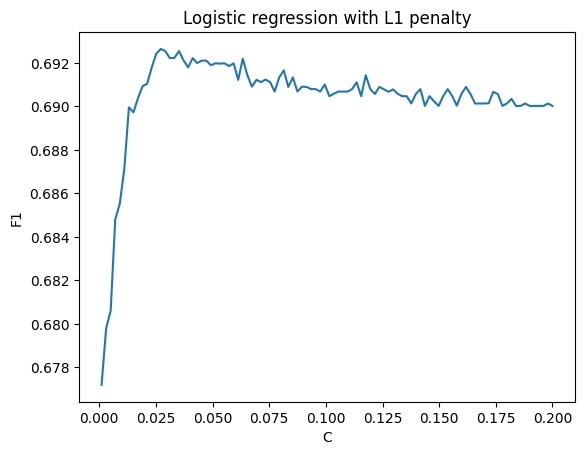

In [25]:
import seaborn as sns

p = sns.lineplot(x=cs, y=f1_l1)
p.set_xlabel("C")
p.set_ylabel("F1")
p.set_title("Logistic regression with L1 penalty")
print(p)


In [18]:
data_ipa_test = pd.read_csv("./SLM_S2024/Competition/IPA_test.csv")
data_ipa_test = data_ipa_test.drop(columns='UserId')
data_ipa_test["BoilGravity"] = data_ipa_test["BoilGravity"].fillna(-999)
data_ipa_test["PitchRate"] = data_ipa_test["PitchRate"].fillna(-999)

In [19]:
model = LR(C= cs[np.argmax(f1_l1)] ,penalty='l1', max_iter=1000, solver='liblinear')
model.fit(X_train,y_train )
y_predict = model.predict(data_ipa_test)

In [32]:
y_predict = pd.DataFrame(y_predict)

In [33]:
y_predict = y_predict.rename(columns={0:'Prediction'})

In [34]:
y_predict.to_csv("./GuCCi_IPA_prediction.csv", index = False)

In [26]:
grid = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_features': np.linspace(1, X_train.shape[1], 5).astype(int)
}
tuning_res_rf = GridSearchCV(RFC(random_state=42),
                             param_grid=grid,
                             scoring='accuracy',
                             n_jobs=1,
                             cv=3,
                             verbose=2)
tuning_res_rf.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] END ....................max_features=1, n_estimators=50; total time=   1.0s
[CV] END ....................max_features=1, n_estimators=50; total time=   0.9s
[CV] END ....................max_features=1, n_estimators=50; total time=   1.0s
[CV] END ...................max_features=1, n_estimators=100; total time=   1.8s
[CV] END ...................max_features=1, n_estimators=100; total time=   1.8s
[CV] END ...................max_features=1, n_estimators=100; total time=   1.9s
[CV] END ...................max_features=1, n_estimators=200; total time=   3.6s
[CV] END ...................max_features=1, n_estimators=200; total time=   3.6s
[CV] END ...................max_features=1, n_estimators=200; total time=   3.6s
[CV] END ...................max_features=1, n_estimators=300; total time=   5.1s
[CV] END ...................max_features=1, n_estimators=300; total time=   5.3s
[CV] END ...................max_features=1, n_es

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_features': array([1, 3, 5, 7, 9]),
                         'n_estimators': [50, 100, 200, 300, 400]},
             scoring='accuracy', verbose=2)

In [27]:
n_trees = grid['n_estimators']
max_features = grid['max_features']
arr = tuning_res_rf.cv_results_['mean_test_score'].reshape(
    len(max_features), len(n_trees))
df = pd.DataFrame(arr, columns=n_trees, index=max_features)

Axes(0.125,0.11;0.62x0.77)


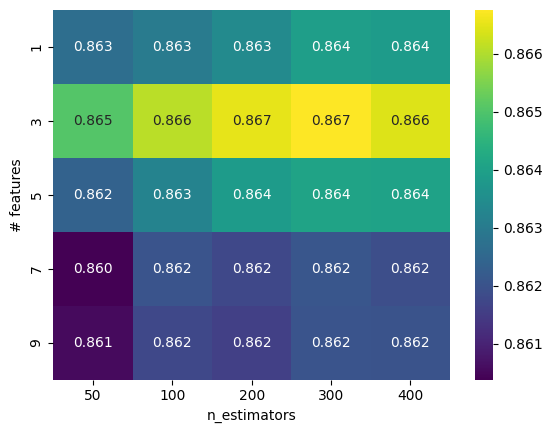

In [28]:
p = sns.heatmap(df, annot=True, fmt='.3f', cmap='viridis')
p.set_xlabel("n_estimators")
p.set_ylabel("# features")
print(p)

In [29]:
print(tuning_res_rf.best_params_)
Best_RF = tuning_res_rf.best_estimator_

{'max_features': 3, 'n_estimators': 300}


<function matplotlib.pyplot.show(close=None, block=None)>

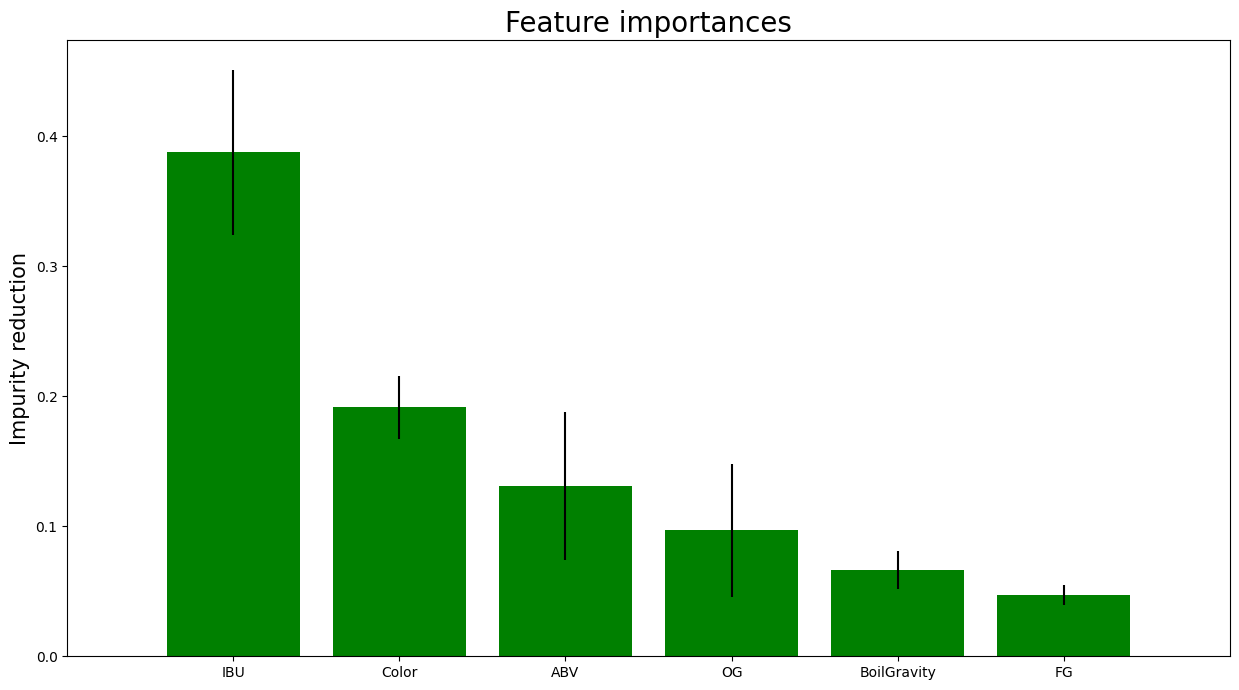

In [30]:
# Plot the feature importances of the forest
importances = Best_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in Best_RF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

num_feat = 6
plt.figure(figsize=[15, 8])
plt.title("Feature importances", fontsize=20)
plt.bar(range(num_feat)[:num_feat],
        importances[indices][:num_feat],
        color="g",
        yerr=std[indices][:num_feat],
        align="center")
plt.xticks(range(num_feat)[:num_feat], X_train.columns[indices[:num_feat]])
plt.xlim([-1, num_feat])
plt.ylabel("Impurity reduction", fontsize=15)
plt.show

In [31]:
y_predict = Best_RF.predict(X_test)
print(f1_score(y_test,y_predict))

0.7780701754385965
